# DBSCAN

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [ ]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)


In [ ]:
X_m, y_m = make_moons(250, noise = 0.05, random_state = 42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
)



## Visualización de datos

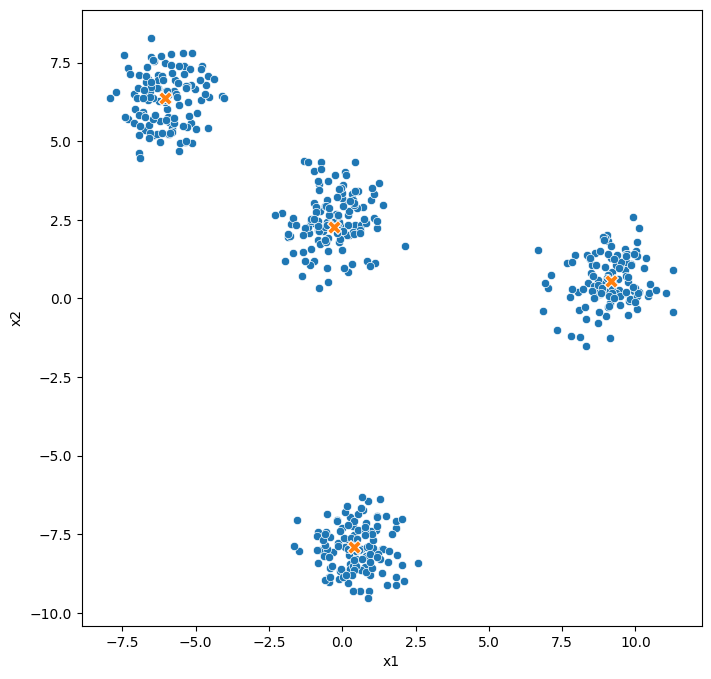

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df_blobs, x = "x1", y = "x2")
sns.scatterplot(data = df_centers, x = "x1", y = "x2", marker = "X", s = 100)
plt.show()

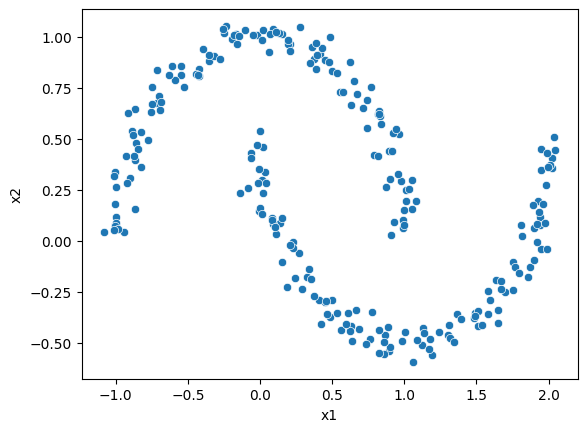

In [ ]:
#plt.figure(figsize = (8,8))
sns.scatterplot(data = df_moons, x = "x1", y = "x2")
plt.show()

## Implementando DBSCAN

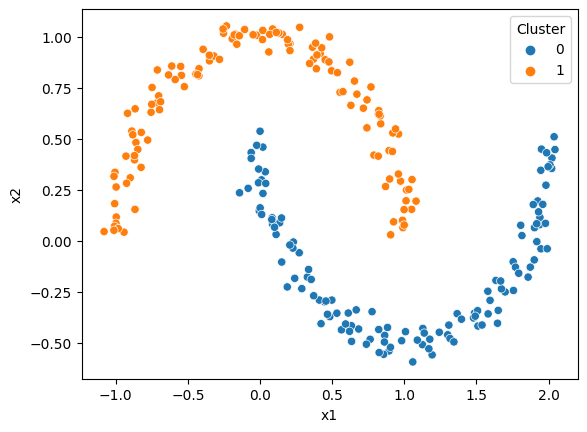

In [ ]:
dbscan_cluster = DBSCAN(eps = 0.3, min_samples = 3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons["Cluster"] = y_m_predict
sns.scatterplot(data = df_moons, x = "x1", y = "x2", hue = "Cluster")
plt.show()

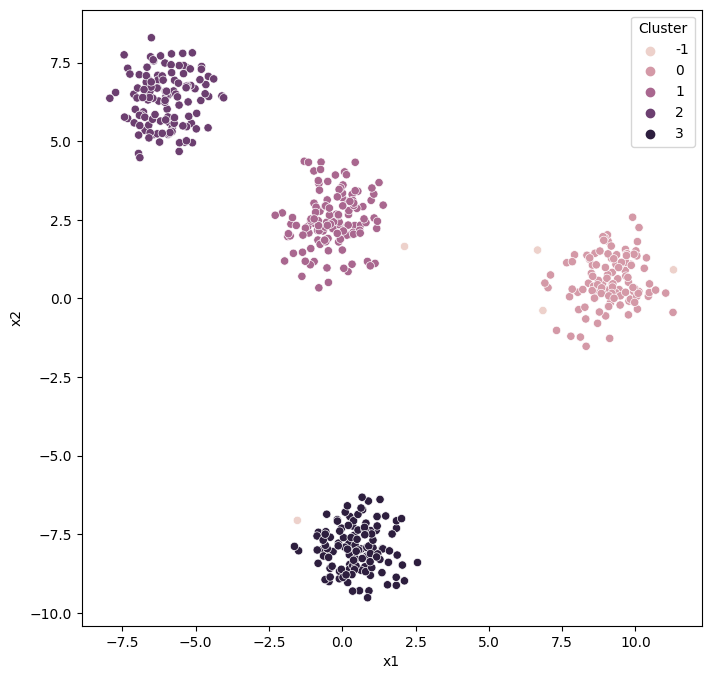

In [ ]:
dbscan_cluster = DBSCAN(eps = .7, min_samples = 3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs["Cluster"] = y_predict

plt.figure(figsize = (8,8))
sns.scatterplot(data = df_blobs, x = "x1", y = "x2", hue = "Cluster")
plt.show()

## Hyperparameters

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors(n_neighbors = 3)
neighbors_fit = neighbors.fit(X)
distances, index = neighbors_fit.kneighbors(X)

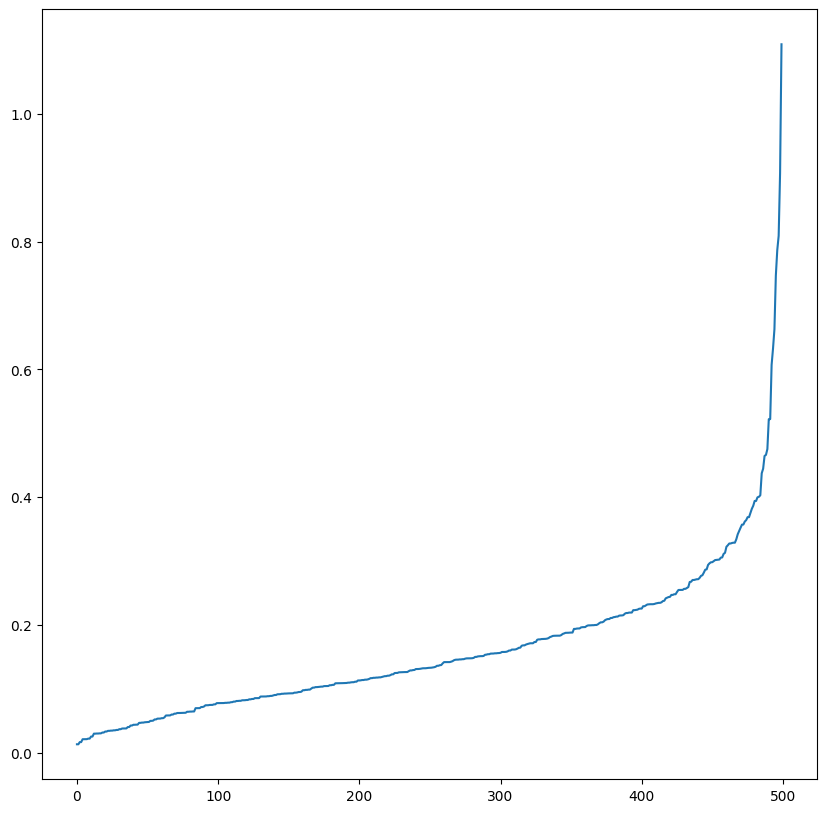

In [ ]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

plt.figure(figsize = (10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(0.2, 1, 0.05)
min_samples = np.arange(2,8, 1)

In [ ]:
from itertools import product

In [ ]:
dbscan_params = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_params:
  y_pred = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(X)
  sil_scores.append(silhouette_score(X, y_pred))


In [ ]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns = ["Eps", "Min_Samples"])
df_params_tunning["Sil_Scores"] = sil_scores

In [ ]:
pivot_data = pd.pivot_table(df_params_tunning, values = "Sil_Scores", index = "Min_Samples", columns = "Eps")

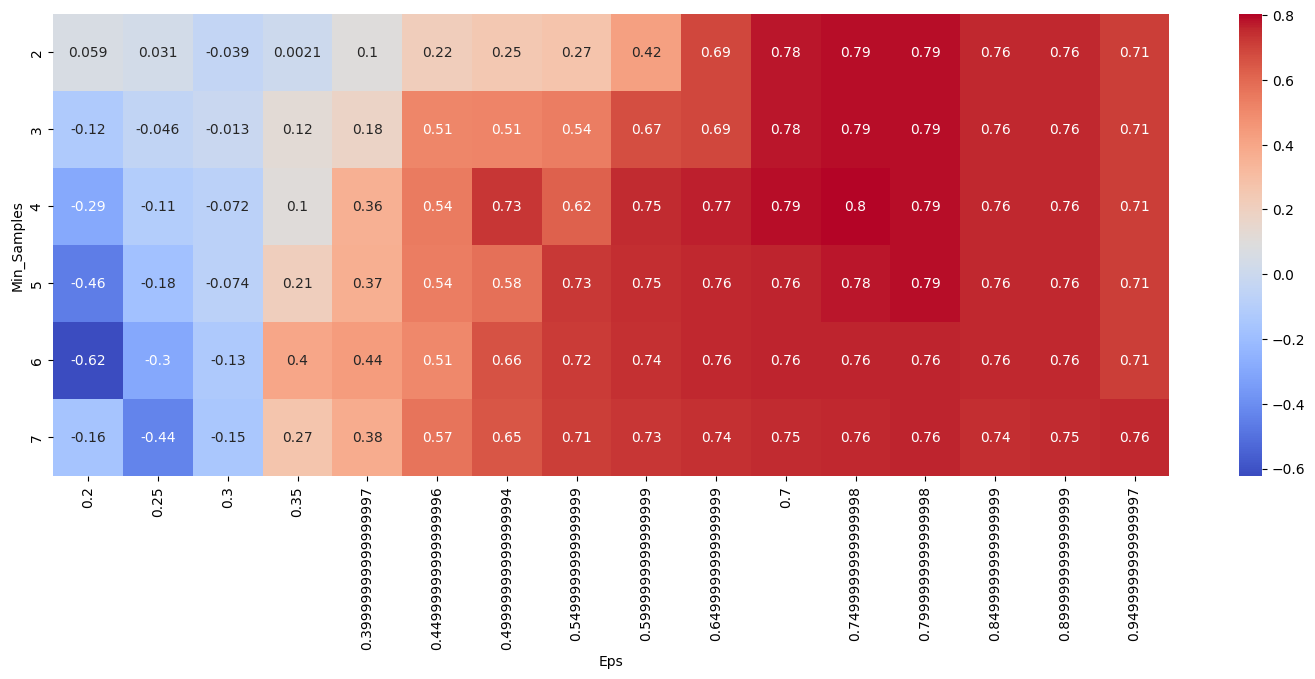

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
sns.heatmap(data = pivot_data, annot = True, annot_kws = {"size" : 10}, cmap = "coolwarm", ax = ax)
plt.show()

## Evaluación de DBSCAN

### Liga para la descarga del código que genera la grafica de silueta: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
dbscan_cluster = DBSCAN(eps = 0.75, min_samples = 4)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs["Cluster"] = y_predict

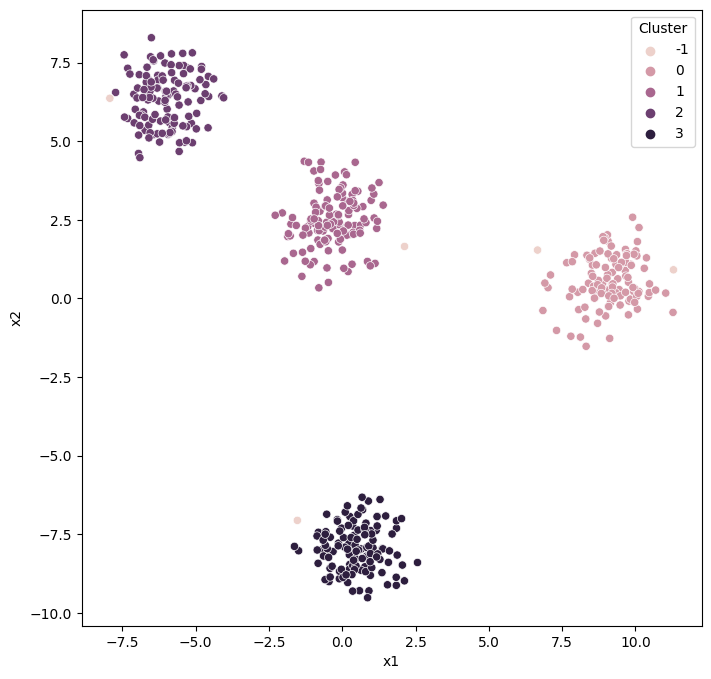

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df_blobs, x = "x1", y = "x2", hue = "Cluster")
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.8035339936384005


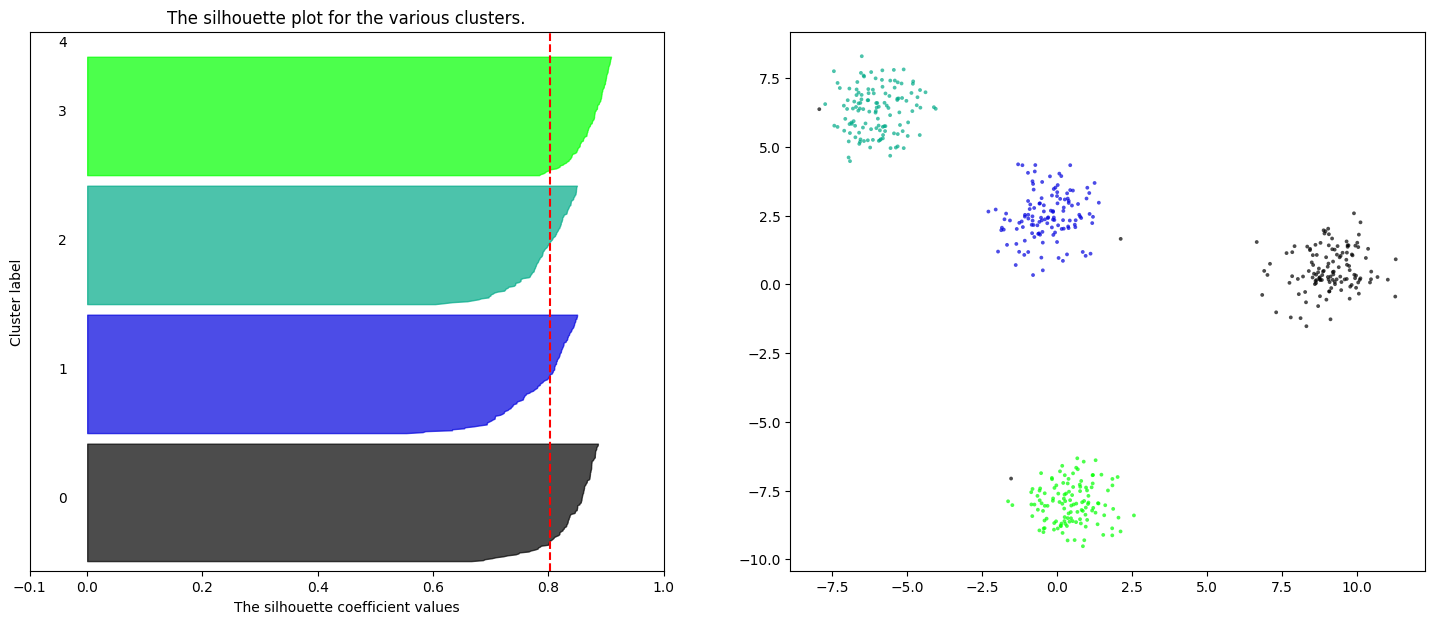

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps = 0.75, min_samples = 4)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = DBSCAN(eps = 0.75, min_samples = 4)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()